In [63]:
import pandas as pd
import matplotlib.pyplot as plt

In [64]:
data = pd.read_csv('penaltis.csv')

data.describe()

,tiempo_entrenando_horas,penaltis_marcados
count,200.000000,200.000000
mean,121.001558,49.097048
std,73.722858,30.225168
min,1.380529,0.000000
25%,57.145604,21.431410
50%,123.621563,46.439024
75%,189.214904,76.199529
max,246.721734,100.000000


Cargamos un CSV de prueba hecho a mano rapidamente con horas_entrenamiento (0-250) y penaltis_marcados (0-100).

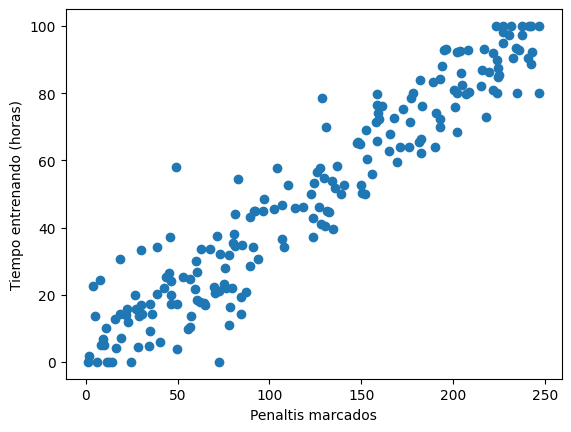

In [85]:
plt.scatter(data.tiempo_entrenando_horas, data.penaltis_marcados)
plt.xlabel("Penaltis marcados")
plt.ylabel("Tiempo entrenando (horas)")
plt.show()

Creamos una función que con descenso de gradiente va ajustando los parámetros m y b de la recta y=mx+b. En cada iteración calcula cuánto error hay y mueve m y b en la dirección que lo reduce, hasta acercarse a los valores más óptimos.

In [86]:
def gradient_descent(m_now, b_now, points, lr):
  m_gradient = 0
  b_gradient = 0

  n= len(points)

  for i in range(n):
    x = points.iloc[i].tiempo_entrenando_horas
    y = points.iloc[i].penaltis_marcados

    m_gradient += -(2/n) * x * (y - (m_now * x + b_now))
    b_gradient += -(2/n) * (y - (m_now * x + b_now))

  m = m_now - m_gradient * lr
  b = b_now - b_gradient * lr
  return m,b

Hiperparametros

In [91]:
m = 0
b = 0
lr = 0.001
epochs = 250

In [92]:
for i in range(epochs):
  if i % 50 == 0:
    print(f'Epoch: {i}')
  m,b = gradient_descent(m,b,data, lr)
print(f'Entrenado {m,b}')

Epoch: 0
Epoch: 50
Epoch: 100
Epoch: 150


/tmp/ipython-input-3278490950.py:11: RuntimeWarning: overflow encountered in scalar add
  m_gradient += -(2/n) * x * (y - (m_now * x + b_now))
/tmp/ipython-input-3278490950.py:14: RuntimeWarning: invalid value encountered in scalar subtract
  m = m_now - m_gradient * lr


Epoch: 200
Entrenado (np.float64(nan), np.float64(nan))


Al tener:
*   x = 0-250
*   y = 0-100

al multiplicar por 0.001, los datos se vuelven demasiado grandes y causa un "overflow", es decir, el salto de m y b es tan grnde que los parametros se disparan.

Por lo que vamos a normalizar el dataset para que los datos queden entre 0 y 1.

In [89]:
data_norm = data.copy()
data_norm["tiempo_entrenando_horas"] = data["tiempo_entrenando_horas"] / data["tiempo_entrenando_horas"].max()
data_norm["penaltis_marcados"] = data["penaltis_marcados"] / data["penaltis_marcados"].max()

In [106]:
m = 0
b = 0
lr = 0.001
epochs = 2000

In [107]:
for i in range(epochs):
  if i % 100 == 0:
    print(f'Epoch: {i}')
  m,b = gradient_descent(m,b,data_norm, lr)
print(f'Entrenado {m,b}')

Epoch: 0
Epoch: 100
Epoch: 200
Epoch: 300
Epoch: 400
Epoch: 500
Epoch: 600
Epoch: 700
Epoch: 800
Epoch: 900
Epoch: 1000
Epoch: 1100
Epoch: 1200
Epoch: 1300
Epoch: 1400
Epoch: 1500
Epoch: 1600
Epoch: 1700
Epoch: 1800
Epoch: 1900
Entrenado (np.float64(0.39919030483561146), np.float64(0.31275008047049635))


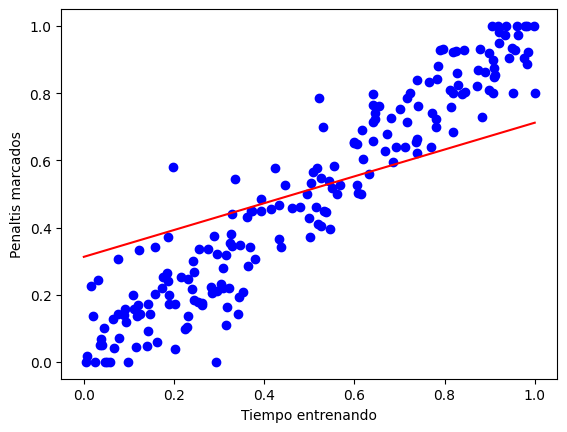

In [108]:
plt.scatter(data_norm["tiempo_entrenando_horas"], data_norm["penaltis_marcados"], color="blue")
x_line = [i/100 for i in range(0, 101)]
y_line = [m * x + b for x in x_line]
plt.plot(x_line, y_line, color="red")
plt.xlabel("Tiempo entrenando")
plt.ylabel("Penaltis marcados")
plt.show()

Vemos que no esta bien del todo, vamos a ver si ajustando hiperparametros podemos mjorarlo.

In [110]:
lr = 0.01
epochs = 2000

for i in range(epochs):
  if i % 100 == 0:
    print(f'Epoch: {i}')
  m,b = gradient_descent(m,b,data_norm, lr)
print(f'Entrenado {m,b}')

Epoch: 0
Epoch: 100
Epoch: 200
Epoch: 300
Epoch: 400
Epoch: 500
Epoch: 600
Epoch: 700
Epoch: 800
Epoch: 900
Epoch: 1000
Epoch: 1100
Epoch: 1200
Epoch: 1300
Epoch: 1400
Epoch: 1500
Epoch: 1600
Epoch: 1700
Epoch: 1800
Epoch: 1900
Entrenado (np.float64(0.9287737964909888), np.float64(0.036705209315138536))


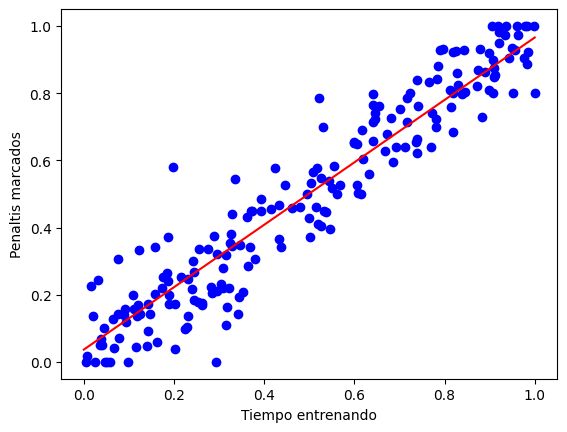

In [111]:
plt.scatter(data_norm["tiempo_entrenando_horas"], data_norm["penaltis_marcados"], color="blue")
x_line = [i/100 for i in range(0, 101)]
y_line = [m * x + b for x in x_line]
plt.plot(x_line, y_line, color="red")
plt.xlabel("Tiempo entrenando")
plt.ylabel("Penaltis marcados")
plt.show()

Esto ya tiene mucha mejor pinta